In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('diabetes.csv')

In [3]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataframe.shape

(768, 9)

In [5]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
x = dataframe.iloc[:,:-1].values

In [7]:
y = dataframe.Outcome

In [8]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [10]:
from scipy import stats
dataframe_zscore = dataframe[(np.abs(stats.zscore(dataframe)) < 3).all(axis=1)]

In [11]:
import pandas as pd

def remove_outliers(dataset,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = dataset[col].mean()
        sd = dataset[col].std()
        
        df = dataset[(dataset[col] <= mean+(n_std*sd))]
        
    return df

In [12]:
columns = dataframe.columns
n_std = 4
dataframe_no_outliers = remove_outliers(dataframe_zscore, columns, n_std)

Working on column: Pregnancies
Working on column: Glucose
Working on column: BloodPressure
Working on column: SkinThickness
Working on column: Insulin
Working on column: BMI
Working on column: DiabetesPedigreeFunction
Working on column: Age
Working on column: Outcome


In [13]:
dataframe_no_outliers.shape

(688, 9)

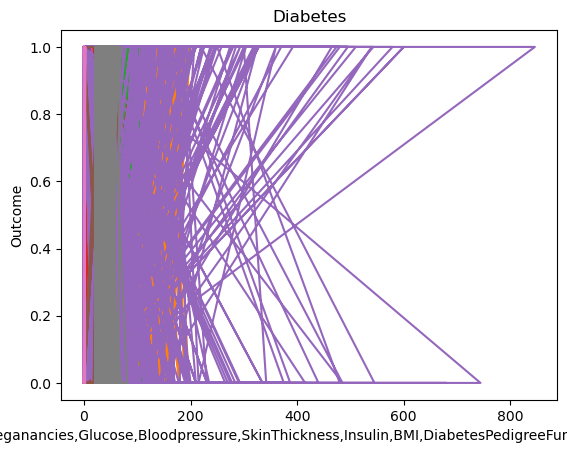

In [14]:
plt.plot(x,y)
plt.xlabel('Preganancies,Glucose,Bloodpressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age')
plt.ylabel('Outcome')
plt.title('Diabetes')
plt.show()

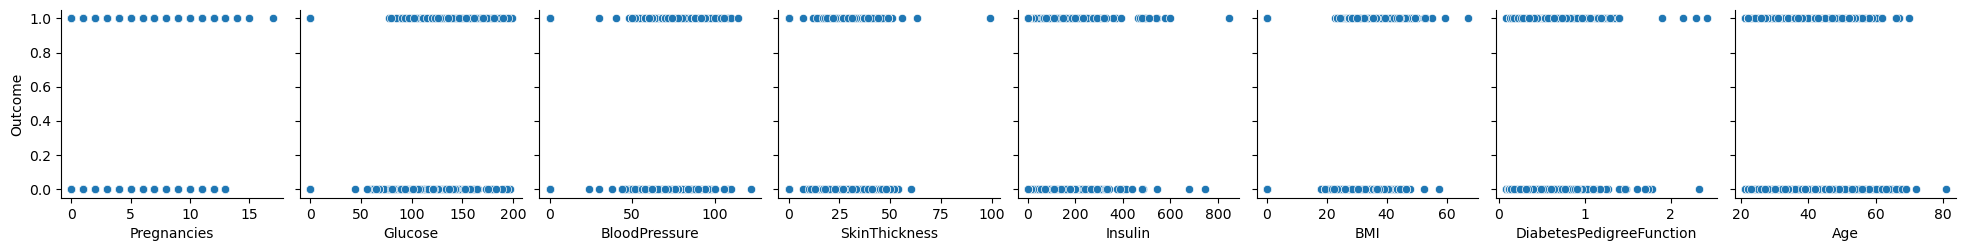

In [15]:
sns.pairplot(dataframe,x_vars=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],y_vars ='Outcome',kind ='scatter',diag_kind = None)

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state =0)

In [18]:
x_train

array([[0.00e+00, 1.51e+02, 9.00e+01, ..., 4.21e+01, 3.71e-01, 2.10e+01],
       [1.00e+00, 8.30e+01, 6.80e+01, ..., 1.82e+01, 6.24e-01, 2.70e+01],
       [2.00e+00, 1.22e+02, 7.00e+01, ..., 3.68e+01, 3.40e-01, 2.70e+01],
       ...,
       [4.00e+00, 9.40e+01, 6.50e+01, ..., 2.47e+01, 1.48e-01, 2.10e+01],
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 0.00e+00, 6.40e-01, 6.90e+01]])

In [19]:
y_train


580    1
418    0
764    0
363    1
757    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 537, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(accuracy_score(y_test,y_pred_en))

[[145  12]
 [ 50  24]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       157
           1       0.67      0.32      0.44        74

    accuracy                           0.73       231
   macro avg       0.71      0.62      0.63       231
weighted avg       0.72      0.73      0.70       231

0.7316017316017316


In [23]:
a = accuracy_score(y_test,y_pred_en)
print(a*100)

73.16017316017316


In [24]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_en))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_en))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_en)))

Mean Absolute Error: 0.2683982683982684
Mean Squared Error: 0.2683982683982684
Root Mean Squared Error: 0.5180716826832639


[Text(0.5, 0.875, 'x[1] <= 0.713\nentropy = 0.944\nsamples = 537\nvalue = [343, 194]'),
 Text(0.25, 0.625, 'x[5] <= -0.723\nentropy = 0.8\nsamples = 412\nvalue = [312, 100]'),
 Text(0.125, 0.375, 'x[7] <= 1.654\nentropy = 0.187\nsamples = 105\nvalue = [102, 3]'),
 Text(0.0625, 0.125, 'entropy = 0.085\nsamples = 94\nvalue = [93, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.684\nsamples = 11\nvalue = [9, 2]'),
 Text(0.375, 0.375, 'x[7] <= -0.431\nentropy = 0.9\nsamples = 307\nvalue = [210, 97]'),
 Text(0.3125, 0.125, 'entropy = 0.642\nsamples = 147\nvalue = [123, 24]'),
 Text(0.4375, 0.125, 'entropy = 0.994\nsamples = 160\nvalue = [87, 73]'),
 Text(0.75, 0.625, 'x[1] <= 1.396\nentropy = 0.808\nsamples = 125\nvalue = [31, 94]'),
 Text(0.625, 0.375, 'x[6] <= -0.419\nentropy = 0.949\nsamples = 68\nvalue = [25, 43]'),
 Text(0.5625, 0.125, 'entropy = 0.985\nsamples = 28\nvalue = [16, 12]'),
 Text(0.6875, 0.125, 'entropy = 0.769\nsamples = 40\nvalue = [9, 31]'),
 Text(0.875, 0.375, 'x[7] <= 1.987\n

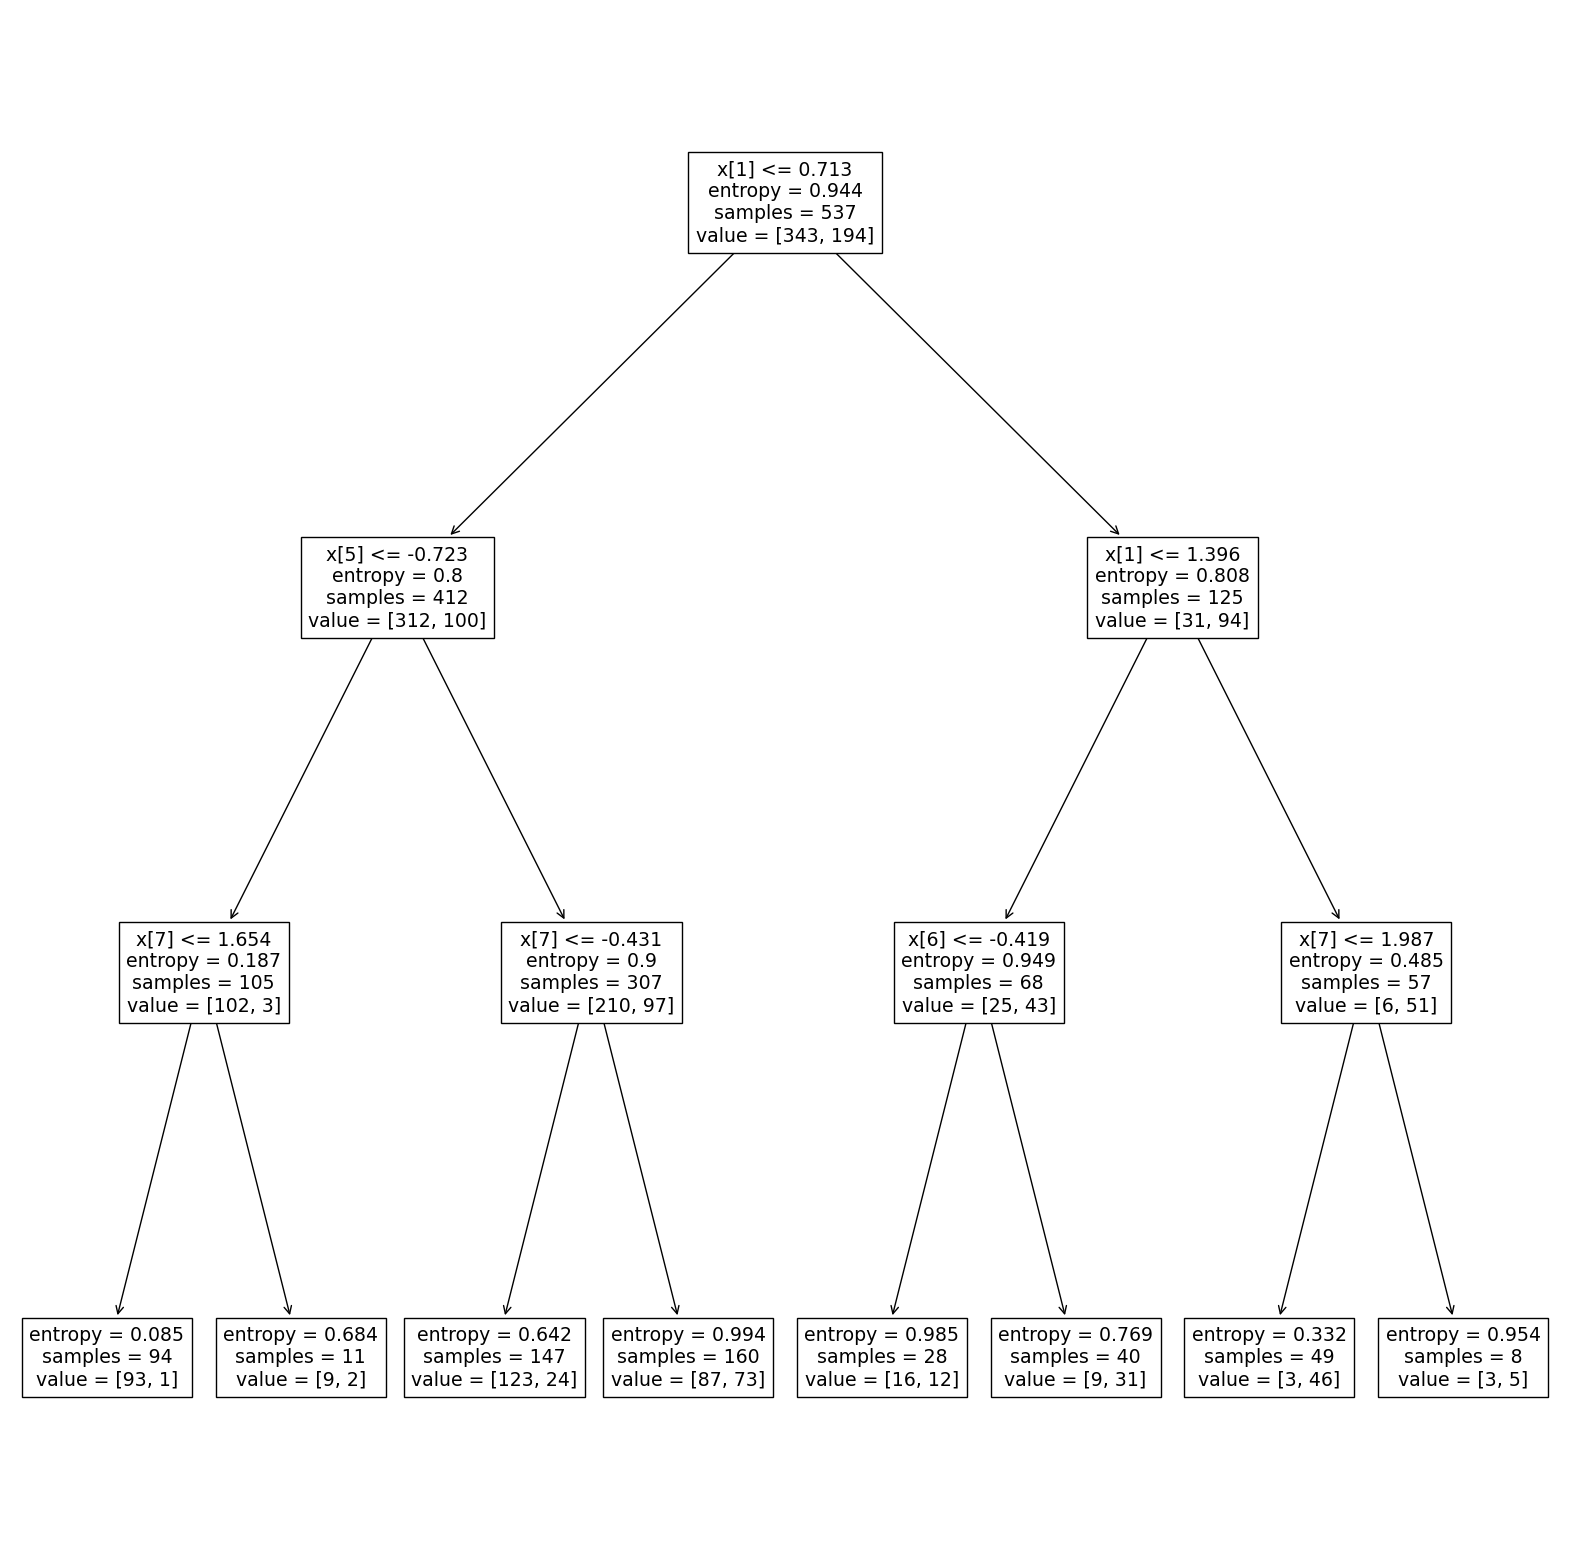

In [25]:
plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train, y_train))

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(accuracy_score(y_test,y_pred_en))

[[144  13]
 [ 50  24]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       157
           1       0.65      0.32      0.43        74

    accuracy                           0.73       231
   macro avg       0.70      0.62      0.63       231
weighted avg       0.71      0.73      0.70       231

0.7272727272727273


In [28]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_en))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_en))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_en)))

Mean Absolute Error: 0.2727272727272727
Mean Squared Error: 0.2727272727272727
Root Mean Squared Error: 0.5222329678670935


[Text(0.5, 0.875, 'x[1] <= 0.713\ngini = 0.462\nsamples = 537\nvalue = [343, 194]'),
 Text(0.25, 0.625, 'x[7] <= -0.431\ngini = 0.368\nsamples = 412\nvalue = [312, 100]'),
 Text(0.125, 0.375, 'x[5] <= -0.225\ngini = 0.203\nsamples = 218\nvalue = [193, 25]'),
 Text(0.0625, 0.125, 'gini = 0.037\nsamples = 106\nvalue = [104, 2]'),
 Text(0.1875, 0.125, 'gini = 0.326\nsamples = 112\nvalue = [89, 23]'),
 Text(0.375, 0.375, 'x[5] <= -0.736\ngini = 0.474\nsamples = 194\nvalue = [119, 75]'),
 Text(0.3125, 0.125, 'gini = 0.111\nsamples = 34\nvalue = [32, 2]'),
 Text(0.4375, 0.125, 'gini = 0.496\nsamples = 160\nvalue = [87, 73]'),
 Text(0.75, 0.625, 'x[5] <= -0.287\ngini = 0.373\nsamples = 125\nvalue = [31, 94]'),
 Text(0.625, 0.375, 'x[4] <= 0.275\ngini = 0.499\nsamples = 25\nvalue = [13, 12]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.6875, 0.125, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.875, 0.375, 'x[1] <= 1.116\ngini = 0.295\nsamples = 100\nva

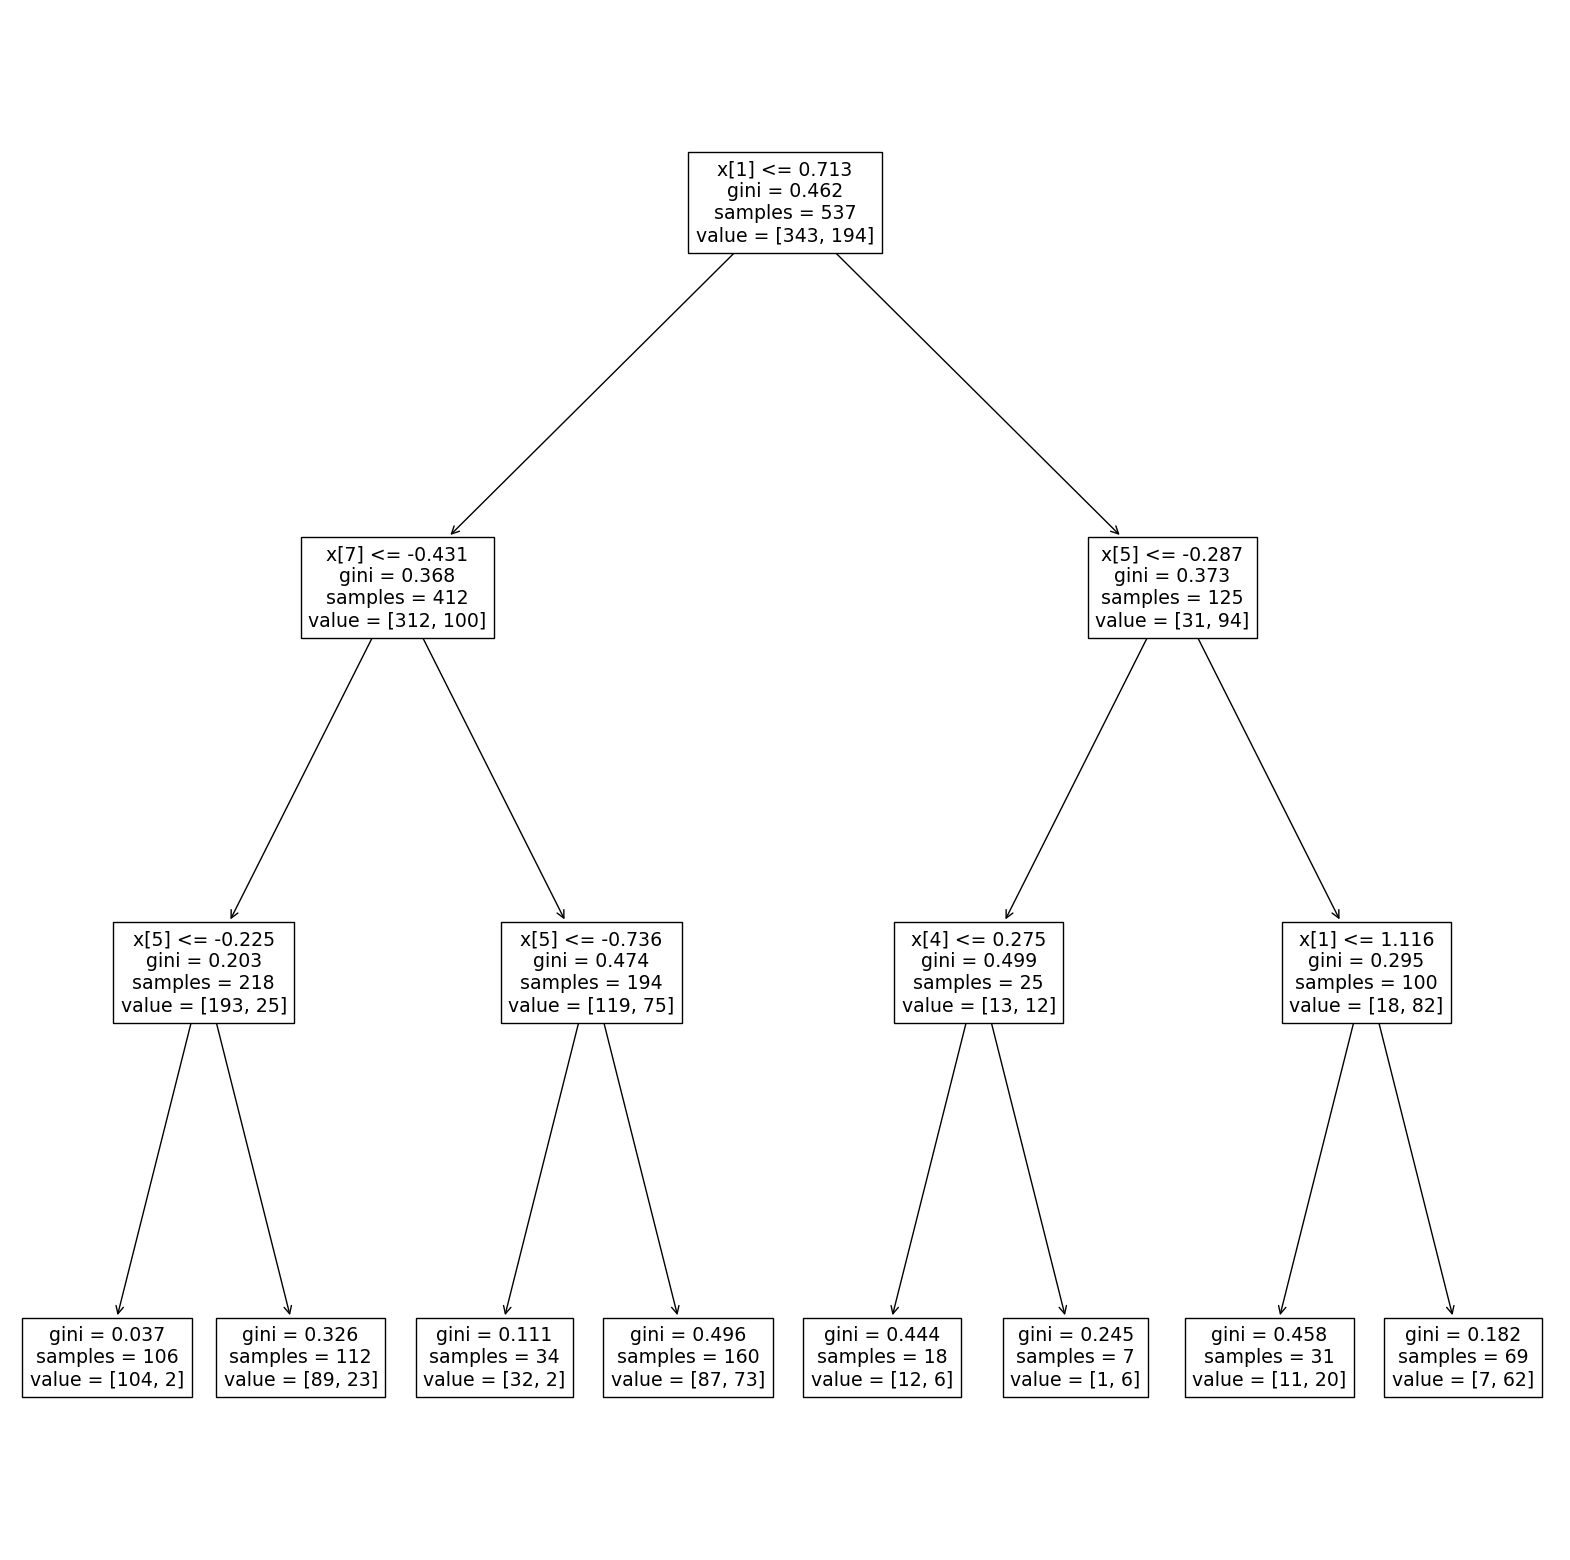

In [29]:
plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train, y_train))

In [30]:
#chi-squared decision tree 
from sklearn.feature_selection import SelectKBest,chi2
diabetesdata = pd.read_csv('diabetes.csv')
p = diabetesdata.drop('Outcome',axis = 1)
q = diabetesdata['Outcome']
x_train, x_test,y_train,y_test = train_test_split(p,q,test_size=0.75,random_state =42)
k_best =SelectKBest(score_func=chi2,k=5)
x_train = k_best.fit_transform(x_train,y_train)
x_test = k_best.transform(x_test)
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
accuracy = clf.score(x_test,y_test)
print('Accuracy with feature selection using chi-square is: ',accuracy)

Accuracy with feature selection using chi-square is:  0.7170138888888888


In [31]:
#changing dept for entropy 5
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(accuracy_score(y_test,y_pred_en))

[[338  39]
 [130  69]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       377
           1       0.64      0.35      0.45       199

    accuracy                           0.71       576
   macro avg       0.68      0.62      0.62       576
weighted avg       0.69      0.71      0.68       576

0.7065972222222222


In [33]:
#changing dept for entropy 10
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(accuracy_score(y_test,y_pred_en))

[[277 100]
 [ 85 114]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       377
           1       0.53      0.57      0.55       199

    accuracy                           0.68       576
   macro avg       0.65      0.65      0.65       576
weighted avg       0.68      0.68      0.68       576

0.6788194444444444


In [35]:
#changing dept for entropy 15
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(accuracy_score(y_test,y_pred_en))

[[276 101]
 [ 84 115]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       377
           1       0.53      0.58      0.55       199

    accuracy                           0.68       576
   macro avg       0.65      0.65      0.65       576
weighted avg       0.69      0.68      0.68       576

0.6788194444444444


In [37]:
#changing dept for entropy 20
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(accuracy_score(y_test,y_pred_en))

[[276 101]
 [ 84 115]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       377
           1       0.53      0.58      0.55       199

    accuracy                           0.68       576
   macro avg       0.65      0.65      0.65       576
weighted avg       0.69      0.68      0.68       576

0.6788194444444444


In [39]:
#chnaging dept for gini 5
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(accuracy_score(y_test,y_pred_en))

[[305  72]
 [ 87 112]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       377
           1       0.61      0.56      0.58       199

    accuracy                           0.72       576
   macro avg       0.69      0.69      0.69       576
weighted avg       0.72      0.72      0.72       576

0.7239583333333334


In [41]:
#chnaging dept for gini 10
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(accuracy_score(y_test,y_pred_en))

[[290  87]
 [ 82 117]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       377
           1       0.57      0.59      0.58       199

    accuracy                           0.71       576
   macro avg       0.68      0.68      0.68       576
weighted avg       0.71      0.71      0.71       576

0.7065972222222222


In [43]:
#chnaging dept for gini 15
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(accuracy_score(y_test,y_pred_en))

[[296  81]
 [ 86 113]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       377
           1       0.58      0.57      0.58       199

    accuracy                           0.71       576
   macro avg       0.68      0.68      0.68       576
weighted avg       0.71      0.71      0.71       576

0.7100694444444444


In [45]:
#chnaging dept for gini 20
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=20, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_en))
print(classification_report(y_test,y_pred_en))
print(accuracy_score(y_test,y_pred_en))

[[296  81]
 [ 86 113]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       377
           1       0.58      0.57      0.58       199

    accuracy                           0.71       576
   macro avg       0.68      0.68      0.68       576
weighted avg       0.71      0.71      0.71       576

0.7100694444444444
